In [1]:
#NAME- AHMAD SIRAJ HASHMI
#TASK1

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
c='http://bit.ly/w-data'

In [4]:
df=pd.read_csv(c)
#data imported succesfully

In [5]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [6]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [8]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

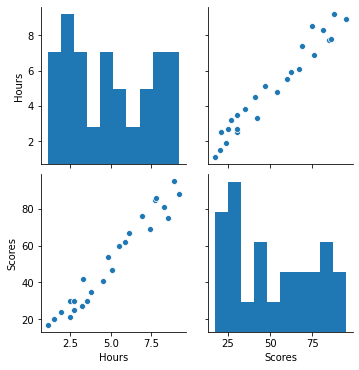

In [9]:
#visualization
sns.pairplot(df)

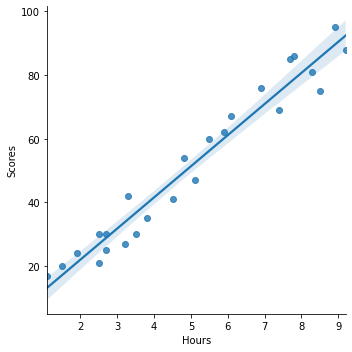

In [10]:
sns.lmplot(data=df,y='Scores',x='Hours')

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X=df.drop('Scores',axis=1)
Y=df['Scores']
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=101)


In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
lm=LinearRegression()

In [15]:
lm.fit(X_train,Y_train)

LinearRegression()

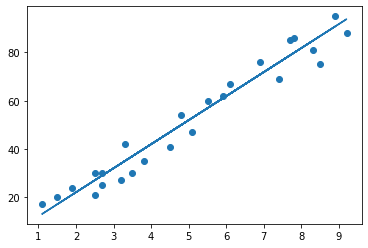

In [16]:
#plotting the regression line 
line=lm.coef_*X+lm.intercept_
plt.scatter(X,Y)
plt.plot(X,line)
plt.show()

In [17]:
predictions=lm.predict(X_test)

Text(0, 0.5, 'predictions')

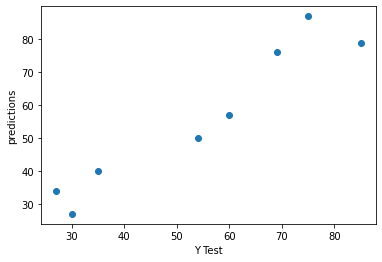

In [18]:
plt.scatter(Y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('predictions')

In [19]:
from sklearn import metrics

In [20]:
print('MAE',metrics.mean_absolute_error(Y_test,predictions))
print('MSE',metrics.mean_squared_error(Y_test,predictions))
print('RMSE',np.sqrt(metrics.mean_squared_error(Y_test,predictions)))

MAE 5.864954643694258
MSE 41.63486564552886
RMSE 6.452508476982333


In [21]:
metrics.explained_variance_score(Y_test,predictions)

0.9076652194870971

In [22]:
lm.coef_

array([9.96651548])

In [23]:
pd.DataFrame(lm.coef_,X.columns,columns=['Coef'])

,Coef
Hours,9.966515


In [24]:
data=pd.DataFrame({'Actual':Y_test,'Prediction':predictions})

In [25]:
data
#data was chosen randomly

,Actual,Prediction
16,30,27.018782
10,85,78.844662
22,35,39.975252
19,69,75.854708
7,60,56.918328
21,54,49.941767
2,27,33.995343
3,75,86.817875


In [27]:
print('Question= how much will a student score if he studies 9.25hours a day?')

Question= how much will a student score if he studies 9.25hours a day?


In [26]:

print('A student who studies 9.25 hours a day scores about',lm.predict([[9.25]]))

A student who studies 9.25 hours a day scores about [94.29276126]
